#### Extract Training Data

In [114]:
training.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [115]:
# Orange Churn Dataset https://bigml.com/user/francisco/gallery/dataset/5163ad540c0b5e5b22000383
# https://github.com/RichardAfolabi/Realtime-Data-Analytics-Using-Spark/blob/master/Analyzing%20Orange%20Telecoms%20Customer%20Churn%20Dataset.ipynb
# https://github.com/bensadeghi/pyspark-churn-prediction/blob/master/churn-prediction.ipynb

import numpy as np
import pandas as pd

# extract data from a csv
# notice the cool options to skip lines at the beginning
training = pd.read_csv('./data/churn_train.csv', delimiter=',', dtype=None, header = 0)
print('NUMBER OF COLUMNS: ' + str(len(training.columns)))
training_stat = training.describe()
training_stat.transpose()

NUMBER OF COLUMNS: 20


,count,mean,std,min,25%,50%,75%,max
Account length,2666.0,100.620405,39.563974,1.00,73.0000,100.00,127.000,243.00
Area code,2666.0,437.438860,42.521018,408.00,408.0000,415.00,510.000,510.00
Number vmail messages,2666.0,8.021755,13.612277,0.00,0.0000,0.00,19.000,50.00
Total day minutes,2666.0,179.481620,54.210350,0.00,143.4000,179.95,215.900,350.80
Total day calls,2666.0,100.310203,19.988162,0.00,87.0000,101.00,114.000,160.00
Total day charge,2666.0,30.512404,9.215733,0.00,24.3800,30.59,36.700,59.64
Total eve minutes,2666.0,200.386159,50.951515,0.00,165.3000,200.90,235.100,363.70
Total eve calls,2666.0,100.023631,20.161445,0.00,87.0000,100.00,114.000,170.00
Total eve charge,2666.0,17.033072,4.330864,0.00,14.0500,17.08,19.980,30.91
Total night minutes,2666.0,201.168942,50.780323,43.70,166.9250,201.15,236.475,395.00


In [116]:
training.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [89]:
# Extract labels
#train_y = np.asarray(training[training.columns[-1]])
train_y = training["Churn"]
train_y = np.asarray(train_y)

In [90]:
train_y

array([False, False, False, ..., False, False, False], dtype=bool)

Extract column names of integer type and drop those that are not int

In [91]:
indexes_int = training_stat.transpose().index
indexes_int

Index([u'Account length', u'Area code', u'Number vmail messages',
       u'Total day minutes', u'Total day calls', u'Total day charge',
       u'Total eve minutes', u'Total eve calls', u'Total eve charge',
       u'Total night minutes', u'Total night calls', u'Total night charge',
       u'Total intl minutes', u'Total intl calls', u'Total intl charge',
       u'Customer service calls'],
      dtype='object')

In [92]:
training = training[indexes_int]
print('Number of Columns/Features: ' + str(len(training.columns)))
print("Size of Trainin Set: " + str(len(training)))
training.head()
# Explain wht is the concept of features in Supervised LEarning and that you can have different kind of features.
# THe main point is to try to understand if these features (takes as single or together) are correlated with the churn
# and are significant indicator for predicting it

Number of Columns/Features: 16
Size of Trainin Set: 2666


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


### Extra bonus (Feature analysis)

In [ ]:
# So the first thing to do is to analyse the behaviour of such features

/Users/massimilianoruocco/Documents/ml_talk_hioa/venv/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  import sys


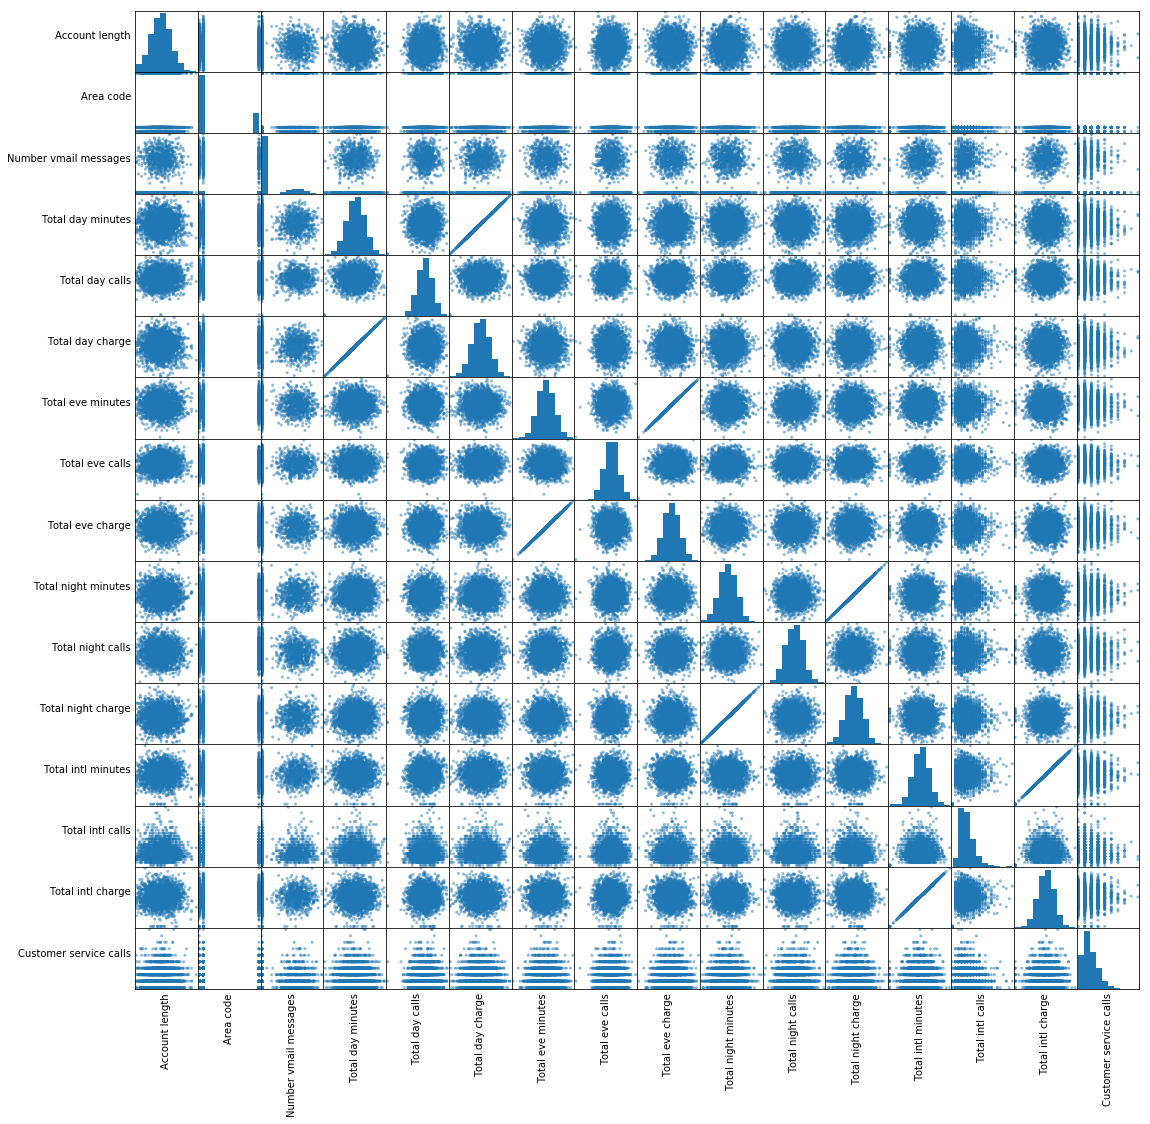

In [29]:
# https://github.com/RichardAfolabi/Realtime-Data-Analytics-Using-Spark/blob/master/Analyzing%20Orange%20Telecoms%20Customer%20Churn%20Dataset.ipynb
# Analysis of features correlation
# scatterplot between pairs of features to find their correlation

%matplotlib inline

axs = pd.scatter_matrix(training, figsize=(18,18))

# Rotate axis labels and remove axis ticks
n = len(training.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

Several of the numerical data are very correlated. (**Total day minutes** and **Total day charge**), (**Total eve minutes** and **Total eve charge**), (**Total night minutes** and **Total night charge**) and lastly (**Total intl minutes** and **Total intl charge**) are alo correlated. We only have to select one of them

In [37]:
training_array = (np.asarray(training))
# create our training data
train_x = []
for x in training_array:
    train_x.append(x[0:-1])
#train_x = [x[0:-1] for x in training_array]

#### Extract Test Data

In [118]:
# 80/20
# extract data from a csv
# notice the cool options to skip lines at the beginning
test = pd.read_csv('./data/churn_test.csv', delimiter=',', dtype=None, header = 0)
print('NUMBER OF COLUMNS: ' + str(len(test.columns)))
test_stat = test.describe()
test_stat.transpose()

NUMBER OF COLUMNS: 20


,count,mean,std,min,25%,50%,75%,max
Account length,667.0,102.841079,40.819480,1.00,76.00,102.00,128.000,232.00
Area code,667.0,436.157421,41.783305,408.00,408.00,415.00,415.000,510.00
Number vmail messages,667.0,8.407796,13.994480,0.00,0.00,0.00,20.000,51.00
Total day minutes,667.0,180.948126,55.508628,25.90,146.25,178.30,220.700,334.30
Total day calls,667.0,100.937031,20.396790,30.00,87.50,101.00,115.000,165.00
Total day charge,667.0,30.761769,9.436463,4.40,24.86,30.31,37.520,56.83
Total eve minutes,667.0,203.355322,49.719268,48.10,171.05,203.70,236.450,361.80
Total eve calls,667.0,100.476762,18.948262,37.00,88.00,101.00,113.000,168.00
Total eve charge,667.0,17.285262,4.226160,4.09,14.54,17.31,20.095,30.75
Total night minutes,667.0,199.685307,49.759931,23.20,167.95,201.60,231.500,367.70


In [119]:
test.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [120]:
# Extract labels
test_y = np.asarray(test["Churn"])

Extract column names of integer type and drop those that are not int

In [126]:
indexes_int = test_stat.transpose().index
indexes_int

Index([u'Account length', u'Area code', u'Number vmail messages',
       u'Total day minutes', u'Total day calls', u'Total day charge',
       u'Total eve minutes', u'Total eve calls', u'Total eve charge',
       u'Total night minutes', u'Total night calls', u'Total night charge',
       u'Total intl minutes', u'Total intl calls', u'Total intl charge',
       u'Customer service calls'],
      dtype='object')

In [130]:
test = test[indexes_int]
print('Number of Columns/Features: ' + str(len(test.columns)))
print("Size of Trainin Set: " + str(len(test)))
test.head()

Number of Columns/Features: 16
Size of Trainin Set: 667


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,117,408,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1
1,65,415,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4
2,161,415,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4
3,111,415,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2
4,49,510,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1


In [145]:
test_array = (np.asarray(test))
# create our test data
test_x = []
for x in test_array:
    test_x.append(x[0:16])
#train_x = [x[0:-1] for x in training_array]



#test_array = (np.asarray(test))
# create our test data
#test_x = [x[0:-1] for x in test_array]

#### Train the model

First test with Support Vector Machine using the sklearn library and his implemented version of svm (https://scikit-learn.org/stable/modules/svm.html) 

In [146]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

In [147]:
clf.fit(train_x, train_y) 

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [148]:
# Prediction
predict_y = clf.predict(test_x)

In [150]:
# Evaluation
from sklearn.metrics import accuracy_score
acc = accuracy_score(predict_y, test_y)
print('Accuracy: ' + str(np.round(acc * 100)) + '%')


Accuracy: 85.0%


#### Compare Different Models

In [151]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

# http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB()]


for name, clf in zip(names, classifiers):
        clf.fit(train_x, train_y)
        score = clf.score(test_x, test_y)
        print(name + ' ' + str(np.round(score, decimals = 4)*100) + '%')


Nearest Neighbors 86.21%
Linear SVM 85.76%
RBF SVM 85.76%
Gaussian Process 83.81%
Decision Tree 93.85%
Random Forest 86.06%
Neural Net 78.11%
AdaBoost 87.11%
Naive Bayes 88.91%


#### Store the model

In [ ]:
import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
clf2.predict(X[0:1])
array([0])
y[0]